In [1]:
import numpy as np
from hdmm import workload, templates, error#, more_templates
%load_ext autoreload
%autoreload 2

In [2]:
W = np.load('MA_Precincts_12_16.npy').reshape(9*200, 2151).astype(np.float)
W = workload.EkteloMatrix(W)
I = workload.Identity(2151)

In [3]:
pid = templates.PIdentity(100, 2151)
pid.optimize(W)
A = pid.strategy()

np.save('redistricting_strategy.npy', A.dense_matrix())

In [4]:
print(error.rootmse(W,W))
print(error.rootmse(W,I))
print(error.rootmse(W,pid.strategy()))
#print(error.rootmse(W, I))
#print(error.rootmse(W, W))

59.44144824596061
15.459624833740305
4.102666600907308


In [ ]:
A = pid.strategy()

In [7]:
error1 = np.sqrt(error.per_query_error(W, W))
error2 = np.sqrt(error.per_query_error(W, I))
error3 = np.sqrt(error.per_query_error(W, A))

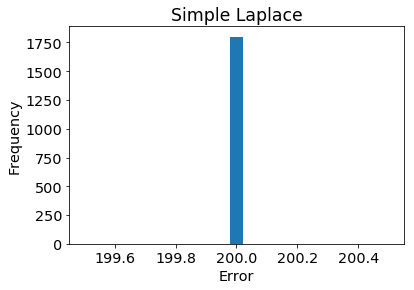

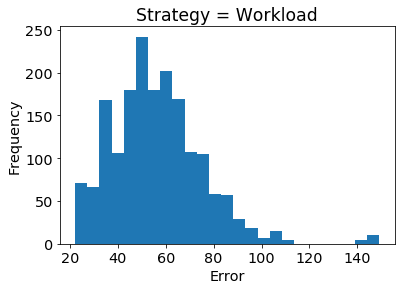

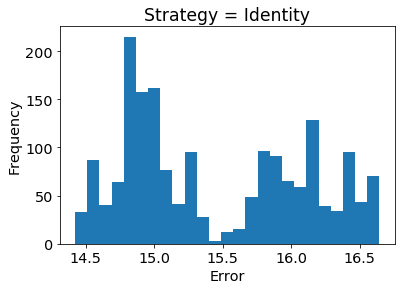

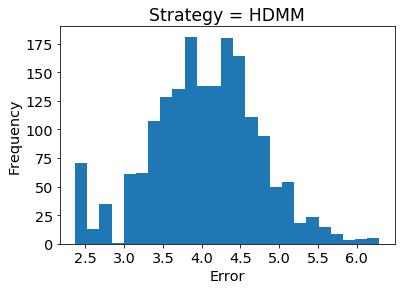

In [37]:
import matplotlib.pyplot as plt

def plot(err, name):
    plt.title(name, fontsize='xx-large')
    plt.hist(err, bins=25)
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.xlabel('Error', fontsize='x-large')
    plt.ylabel('Frequency', fontsize='x-large')
    plt.show()
    
error0 = np.ones_like(error1) * 200

plot(error0, 'Simple Laplace')
plot(error1, 'Strategy = Workload')
plot(error2, 'Strategy = Identity')
plot(error3, 'Strategy = HDMM')

In [39]:
def dev(err):
    return (np.max(err) - np.min(err)) / np.mean(err)

print(dev(error0), dev(error1), dev(error2), dev(error3))

0.0 2.2596699054218274 0.1437996835691294 0.9721316090178986


In [43]:
np.savez('redistricting_errors.npz', error0, error1, error2, error3)

In [56]:
laplace, workload, identity, hdmm = np.load('redistricting_errors.npz').values()

In [57]:
laplace

array([200., 200., 200., ..., 200., 200., 200.])

In [55]:
c

array([16.55294536, 15.26433752, 14.93318452, ..., 16.0623784 ,
       15.93737745, 14.96662955])